In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier


from sklearn.metrics import plot_confusion_matrix
from statsmodels.stats.weightstats import ztest as ztest
from scipy.stats import norm
import researchpy as rp
import scipy.stats as st
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#loading Dataset
df = pd.DataFrame(pd.read_csv("data/diabetes.csv"))

In [3]:
#reviewi
df.head()   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#description of dataset
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#Shape
df.shape 

(768, 9)

In [6]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
#checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [11]:
df.isnull().all()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [12]:
#Replacing nans with zeros
df_new = df.copy(deep = True)
df_new[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_new[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_new.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [13]:
#10 largest values
df.nlargest(10,['BloodPressure'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
106,1,96,122,0,0,22.4,0.207,27,0
691,13,158,114,0,0,42.3,0.257,44,1
43,9,171,110,24,240,45.4,0.721,54,1
177,0,129,110,46,130,67.1,0.319,26,1
549,4,189,110,31,0,28.5,0.680,37,0
84,5,137,108,0,0,48.8,0.227,37,1
362,5,103,108,37,0,39.2,0.305,65,0
658,11,127,106,0,0,39.0,0.190,51,0
662,8,167,106,46,231,37.6,0.165,43,1
672,10,68,106,23,49,35.5,0.285,47,0


In [14]:
#Standardizing the variable
df_new = df.std()

In [15]:
df_new

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

# EDA


In [16]:
df.corr() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

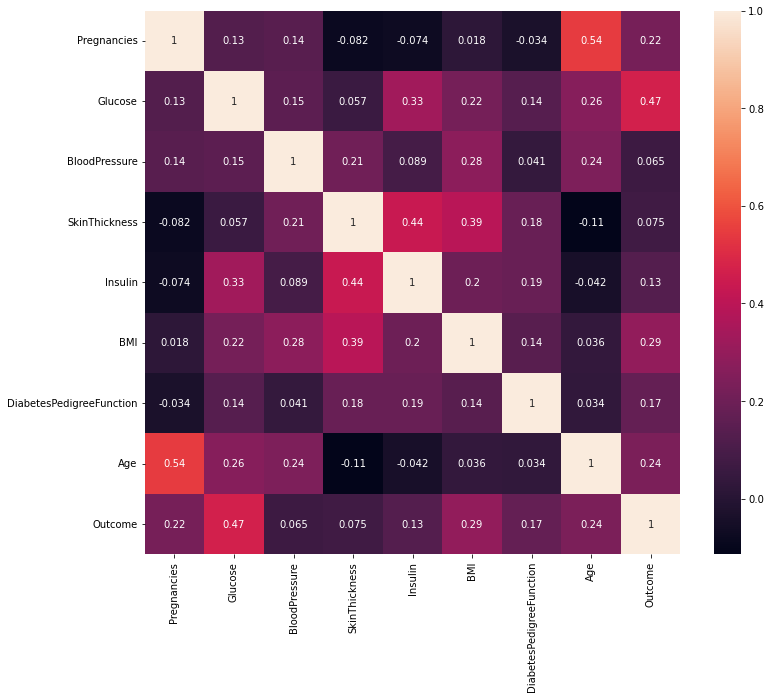

In [17]:
#Heatmap plot
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),annot = True)

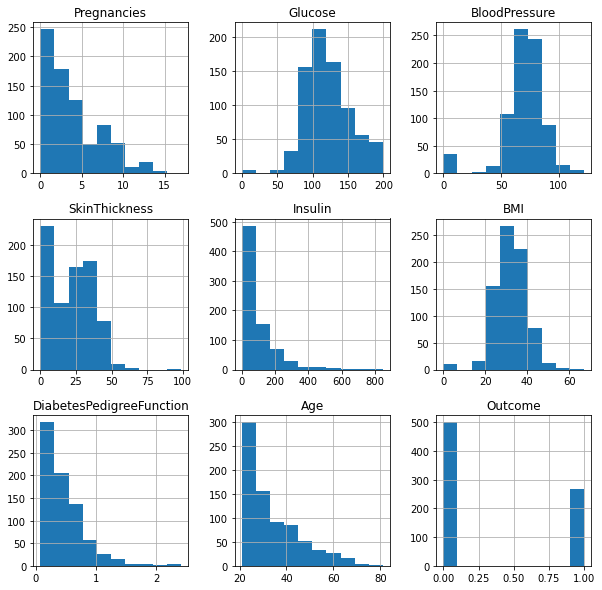

In [18]:
#Histogram
df.hist(figsize = (10,10))
plt.show()

<AxesSubplot:xlabel='count', ylabel='Outcome'>

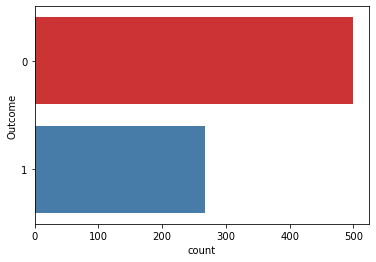

In [19]:
#0 means no diabeted
#1 means patient with diabtes
sns.countplot(y=df['Outcome'],palette='Set1')

# Data Modeling

In [20]:
df.shape

(768, 9)

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
#feature extraction
X=df.drop(columns=['Outcome'])
y=df['Outcome']

In [23]:
#splitting dataset
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [25]:
def tn(y_test, y_pred): return confusion_matrix(y_test, y_train)[0, 0]
def fp(y_test, y_pred): return confusion_matrix(y_test, y_pred)[0, 1]
def fn(y_test, y_pred): return confusion_matrix(y_test, y_pred)[1, 0]
def tp(y_test, y_pred): return confusion_matrix(y_test, y_pred)[1, 1]

In [26]:
#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

In [27]:
#Perform 2 sample z-test
ztest(X_train['BMI'],X_train['Age'],value=0)

(-1.9859287559000809, 0.04704123522220996)

# Implementation of Statistical Hypothesis Test using Scipy and Sci-kit

In [28]:
df.groupby("Outcome").agg({"Glucose":[np.mean, np.std, np.size]})

Glucose                
               mean        std size
Outcome                            
0        109.980000  26.141200  500
1        141.257463  31.939622  268

In [29]:
df_glucose = df[['Glucose', 'Outcome']]

In [30]:
df_glucose["Outcome"].replace({1: "Diabetes", 0: "NotDiabetes"}, inplace=True)
df_glucose
# Need to convert 1 and 0 in Outcome column to Diabetes and NotDiabetes respectively for further hypothesis testing

,Glucose,Outcome
0,148,Diabetes
1,85,NotDiabetes
2,183,Diabetes
3,89,NotDiabetes
4,137,Diabetes
...,...,...
763,101,NotDiabetes
764,122,NotDiabetes
765,121,NotDiabetes
766,126,Diabetes


In [31]:
rp.ttest(group1= df_glucose['Glucose'][df_glucose['Outcome'] == 'Diabetes'], group1_name= "Diabetes",
         group2= df_glucose['Glucose'][df_glucose['Outcome'] == 'NotDiabetes'], group2_name= "NotDiabetes")

(      Variable      N        Mean         SD        SE   95% Conf.    Interval
 0     Diabetes  268.0  141.257463  31.939622  1.951023  137.416116  145.098810
 1  NotDiabetes  500.0  109.980000  26.141200  1.169070  107.683094  112.276906
 2     combined  768.0  120.894531  31.972618  1.153712  118.629722  123.159340,
                        Independent t-test   results
 0  Difference (Diabetes - NotDiabetes) =    31.2775
 1                   Degrees of freedom =   766.0000
 2                                    t =    14.6001
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     1.1053
 7                            Hedge's g =     1.1042
 8                       Glass's delta1 =     0.9793
 9                     Point-Biserial r =     0.4666)

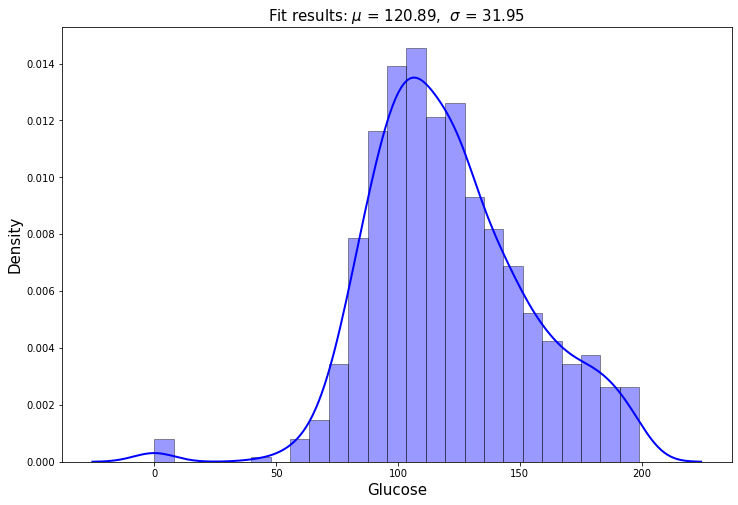

In [32]:
mu, std = norm.fit(df_glucose['Glucose'])
plt.figure(figsize = [12, 8])
sns.distplot(df_glucose['Glucose'], hist=True, kde=True, 
             bins=25, color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("Glucose", size=15)
plt.ylabel("Density", size=15);

In [33]:
Mu = 72.4   
# Std = ?  Population standard deviatin is unknown

x = df['BloodPressure']  # Storing values in a list to avoid long names
est_pop_std = np.sqrt(np.sum(abs(x - x.mean())**2) / (df.size - 1))     #  sqrt(sum(xi - Xbar)^2 / (n -1))

sample_avg_bp =(df['BloodPressure']).mean()

std_error_bp = est_pop_std / np.sqrt(df.size) # Standard dev of the sampling mean distribution... estimated from population

T_Statistic = (( sample_avg_bp - Mu) / std_error_bp)

pvalue = st.t.sf(np.abs(T_Statistic), df.size-1)*2
print("Estimated Pop Stand Dev" , est_pop_std)
print("Sample Avg BP : " , sample_avg_bp)
print("Standard Error: " , std_error_bp)
print("T Statistic" , T_Statistic)
print("Pval" , pvalue)

if pvalue > 0.05:
	print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
	print('Samples are likely drawn from different distributions (reject H0)')

Estimated Pop Stand Dev 6.448200342877043
Sample Avg BP :  69.10546875
Standard Error:  0.07755979591143121
T Statistic -42.47730684802432
Pval 0.0
Samples are likely drawn from different distributions (reject H0)


In [34]:
df_mod = df.copy()
df_mod['BloodPressure'] = df_mod['BloodPressure'].mask(df['BloodPressure'] == 0,df['BloodPressure'].median())

In [35]:

stat, pvalue = ttest_ind(df_mod['BloodPressure'] , df['BloodPressure'])
print("compare means", df_mod['BloodPressure'].mean() , df['BloodPressure'].mean())
print("Tstatistic , Pvalue", stat, pvalue)

if pvalue > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

compare means 72.38671875 69.10546875
Tstatistic , Pvalue 3.983924203237573 7.096423589275457e-05
Samples are likely drawn from different distributions (reject H0)


In [36]:
numerical=df.select_dtypes(include=['int64','float']).columns.tolist()
print(numerical)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [37]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [38]:
##importing stats module from scipy
## retrieving p value from normality test function
PregnanciesPVAL=stats.normaltest(df.Pregnancies).pvalue
GlucosePVAL=stats.normaltest(df.Glucose).pvalue
BloodPressurePVAL=stats.normaltest(df.BloodPressure).pvalue
SkinThicknessPVAL=stats.normaltest(df.SkinThickness).pvalue
InsulinPVAL=stats.normaltest(df.Insulin).pvalue
BMIPVAL=stats.normaltest(df.BMI).pvalue
DiaPeFuPVAL=stats.normaltest(df.DiabetesPedigreeFunction).pvalue
AgePVAL=stats.normaltest(df.Age).pvalue
## Printing the values
print("Pregnancies P Value is " + str(PregnanciesPVAL))
print("Glucose P Value is " + str(GlucosePVAL))
print("BloodPressure P Value is " + str(BloodPressurePVAL))
print("Skin Thickness P Value is " + str(SkinThicknessPVAL))
print("Insulin P Value is " + str(InsulinPVAL))
print("BMI P Value is " + str(BMIPVAL))
print("Diabetes Pedigree Function P Value is " + str(DiaPeFuPVAL))
print("Age P Value is " + str(AgePVAL))

Pregnancies P Value is 3.9142916387836715e-18
Glucose P Value is 0.0020446506991363502
BloodPressure P Value is 3.780127075543807e-67
Skin Thickness P Value is 0.00017124157678801767
Insulin P Value is 6.895342740914799e-85
BMI P Value is 1.9696869549260572e-19
Diabetes Pedigree Function P Value is 1.2987697487612696e-70
Age P Value is 9.308980038236578e-27


# Regression Analysis

In [39]:
model = LogisticRegression(solver='liblinear')
# instantiating the model 

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)

print(model_score)

0.7662337662337663


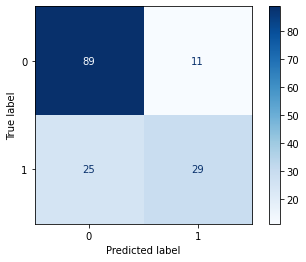

In [40]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues);
# Confusion 

In [41]:
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, y_predict)
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, y_predict)
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, y_predict)
print("F1 Score: %.3f" % f1)

Accuracy: 0.766
Precision: 0.725
Recall: 0.537
F1 Score: 0.617


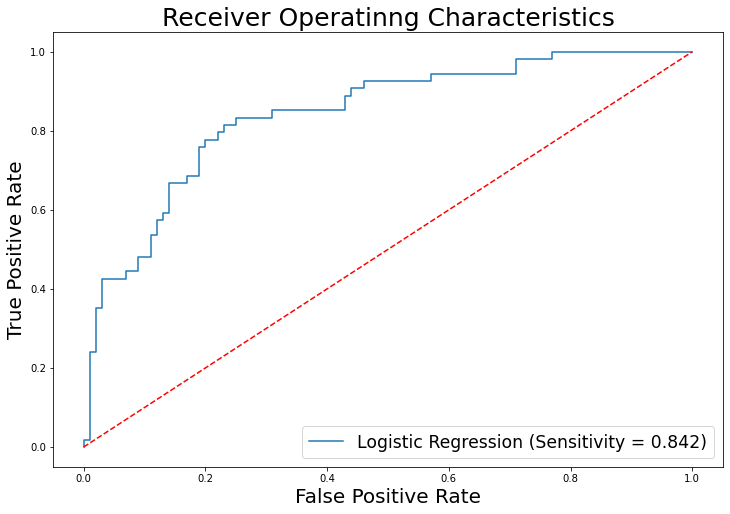

In [42]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Logistic Regression (Sensitivity = %0.3f)" % auc)
plt.legend(loc=4)
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title("Receiver Operatinng Characteristics", size = 25)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4, fontsize='xx-large')
plt.show()
# AUC score for LR model is 0.807


In [43]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       100
           1       0.72      0.54      0.62        54

    accuracy                           0.77       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



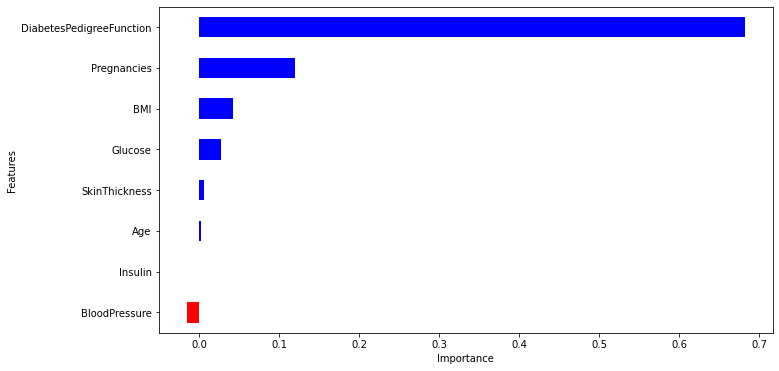

In [44]:
coeff = list(model.coef_[0])
labels = list(X_test.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance');

# Classification modelling

In [45]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [46]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.62337662337663 % and k = [12, 13]


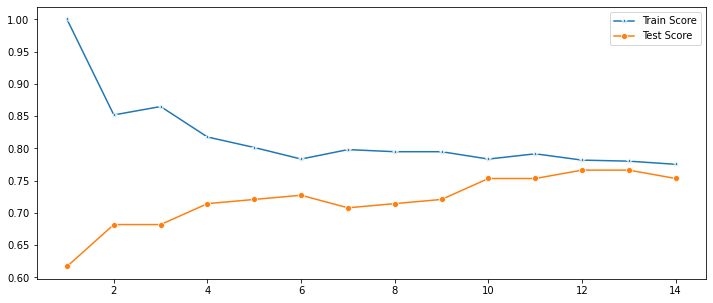

In [47]:
#Result Visualisation
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')
#The best result is captured at k = 11 hence 11 is used for the final model

In [48]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7532467532467533

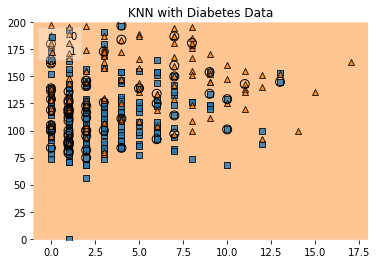

In [49]:
## trying to plot decision boundary 
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

In [50]:
#Predictions iusing classifier
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,86,14,100
1,24,30,54
All,110,44,154


Text(0.5, 15.0, 'Predicted label')

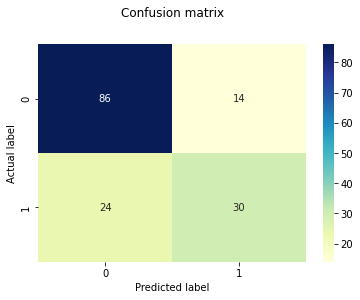

In [51]:
y_pred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [52]:
#classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       100
           1       0.68      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



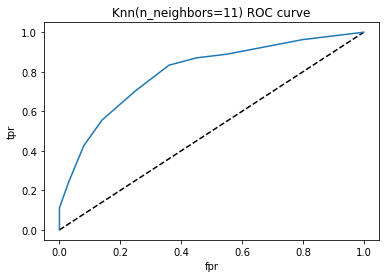

In [53]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [54]:
#Area under ROC curve
roc_auc_score(y_test,y_pred_proba)

0.7975925925925926

# Clustering

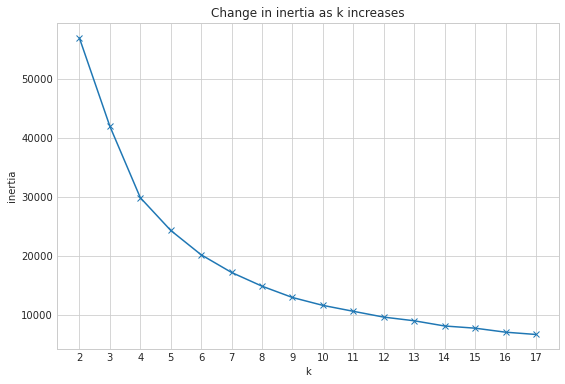

In [55]:
#K-Mean
#Age and BMI Cluster
# elbow test to determine n
from sklearn.cluster import KMeans

# features to predict cluster on, only fitting model on X(train)
X = X_train[['Age','BMI']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 18)}).plot(marker='x')
    plt.xticks(range(2, 18))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

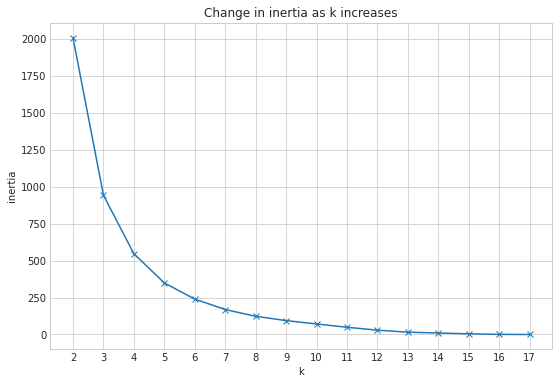

In [56]:
# feature to create cluster on, only fitting model on X(train)
X = X_train[['Pregnancies']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 18)}).plot(marker='x')
    plt.xticks(range(2, 18))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    
# will start with 4 clusters

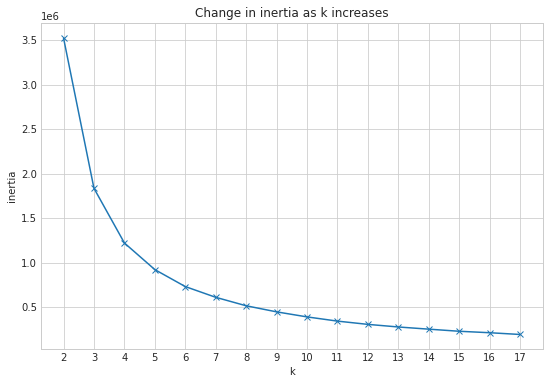

In [57]:
# features to predict cluster on, only fitting model on X(train)
X = X_train[['Insulin','Glucose']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 18)}).plot(marker='x')
    plt.xticks(range(2, 18))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    
# will start with 5 clusters

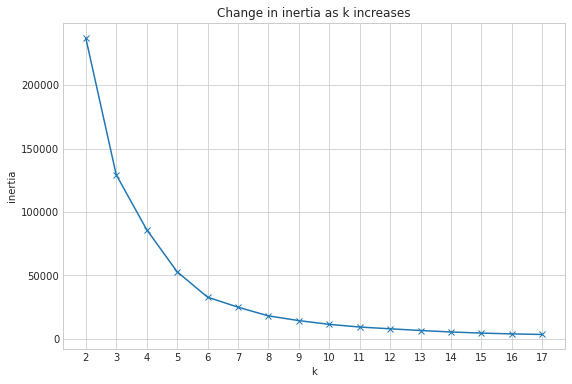

In [58]:
# features to predict cluster on, only fitting model on X(train)
X = X_train[['Glucose']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 18)}).plot(marker='x')
    plt.xticks(range(2, 18))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    
# will start with 5 clusters

# Using any machine learning techniques using available data set to develop a recommendation system.
 


In [59]:
#XGBoost

xgb_model =XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [60]:
xgb_pred = xgb_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 0.7532467532467533


In [61]:
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

[[85 15]
 [23 31]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.67      0.57      0.62        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



In [62]:
xgb_model.feature_importances_

array([0.09129182, 0.25593284, 0.08988538, 0.10210662, 0.12426756,
       0.11596108, 0.09556236, 0.12499232], dtype=float32)

<AxesSubplot:>

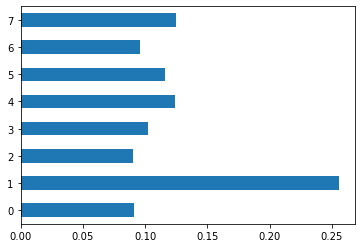

In [63]:
(pd.Series(xgb_model.feature_importances_).plot(kind='barh'))

In [64]:
#Predction
#printing the prediction probabities for the the test data
print('Prediction Probabilities')
xgb_model.predict_proba(X_test)

Prediction Probabilities


array([[9.78801548e-01, 2.11984497e-02],
       [7.52598047e-03, 9.92474020e-01],
       [9.93290246e-01, 6.70977216e-03],
       [9.05330420e-01, 9.46695656e-02],
       [9.97972250e-01, 2.02777400e-03],
       [9.99661446e-01, 3.38533428e-04],
       [9.98731494e-01, 1.26852817e-03],
       [8.96528363e-02, 9.10347164e-01],
       [5.54120541e-03, 9.94458795e-01],
       [8.89595449e-01, 1.10404566e-01],
       [5.22331119e-01, 4.77668881e-01],
       [4.22626734e-03, 9.95773733e-01],
       [9.98794019e-01, 1.20595773e-03],
       [5.26503682e-01, 4.73496288e-01],
       [7.29471326e-01, 2.70528704e-01],
       [3.17178369e-02, 9.68282163e-01],
       [1.50962055e-01, 8.49037945e-01],
       [9.97243464e-01, 2.75652250e-03],
       [9.56076145e-01, 4.39238362e-02],
       [9.75498676e-01, 2.45013516e-02],
       [4.72110569e-01, 5.27889431e-01],
       [3.42077017e-03, 9.96579230e-01],
       [7.34106839e-01, 2.65893161e-01],
       [3.33861470e-01, 6.66138530e-01],
       [1.530368